# Simple neural network

We can use a simple NN to work out the xor problem.
In the most simple way possible we can imagine the xor problem in its logic decomposition.

$(A\land \neg B)\lor (\neg A\land B) = (A + B)$

We can build a simple perceptron with a binary activation function to create the and, the or and the not.

by cabling togheter inputs and outputs you'll have a nn capable of solving the xor.
We can also take ths shortcut $A \lor B = \neg(\neg A \land \neg B)$ so we need less training.



In [3]:
import numpy as np
from Perceptron import Perceptron

t = 1
f = -1

andX = np.array([[f,f],[f,t],[t,f],[t,t]])
andY = np.array([f,f,f,t])

orX = np.array([[f,f],[f,t],[t,f],[t,t]])
orY = np.array([f,t,t,t])

negX = np.array([f,t])
negY = np.array([t,f]) 

p_and = Perceptron()
p_and.set_kernel('bias')
p_and.fit(andX,andY)

p_or = Perceptron()
p_or.set_kernel('bias')
p_or.fit(orX,orY)

p_neg = Perceptron()
p_neg.fit(negX,negY)


In [4]:
print p_neg.decision_function(negX)
print p_and.decision_function(andX)
print p_or.decision_function(andX)

print p_neg.score(negX,negY)
print p_and.score(andX,andY)
print p_or.score(andX,orY)


[[ 1.]
 [-1.]]
[[-1.]
 [-1.]
 [-1.]
 [ 1.]]
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]]
1.0
1.0
1.0


In [5]:
# create the or
def l_or(l_neg,l_and):
    def fun(x):
        a,b = x[0],x[1]
        not_a = l_neg(np.array([a]))
        not_b = l_neg(np.array([b]))
        x1 = np.array([not_a[0][0],not_b[0][0]])
        not_a_and_not_b = l_and(np.array([x1]))
        return l_neg(not_a_and_not_b)
    def fun_map(X):
        n = len(X)
        return np.array(map(fun,X)).reshape(n,1)
    return fun_map

#$(A and neg B)or (neg A and B) = (A + B)$
def l_xor(l_or,l_neg,l_and):
    def fun(x):
        a,b = x[0],x[1]
        not_a = l_neg(np.array([a]))
        not_b = l_neg(np.array([b]))
        x1 = np.array([a,not_b[0][0]])
        x2 = np.array([not_a[0][0],b])
        a_and_not_b = l_and(np.array([x1]))
        not_a_and_b = l_and(np.array([x2]))
        x3 = np.array([not_a_and_b[0][0],a_and_not_b[0][0]])
        return l_or(np.array([x3]))
    def fun_map(X):
        n = len(X)
        return np.array(map(fun,X)).reshape(n,1)
    return fun_map

p_xor = l_xor(p_or.decision_function,p_neg.decision_function,p_and.decision_function)
y= p_xor(andX)
print y
      

[[-1.]
 [ 1.]
 [ 1.]
 [-1.]]


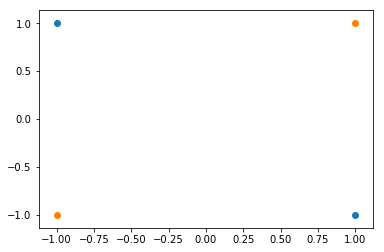

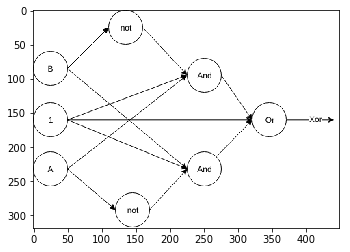

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('xor.png')
p_xor = l_xor(p_or.decision_function,p_neg.decision_function,p_and.decision_function)
y= p_xor(andX)

N = len(y)
y = y.reshape(N)
plt.scatter(andX[y==1][:,0],andX[y==1][:,1])
plt.scatter(andX[y==-1][:,0],andX[y==-1][:,1])
plt.show()
plt.figure(figsize=(10,10))
imgplot = plt.imshow(img)
plt.show()
